# Results in the paper

In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path

import config

from experiments import *
from utilplots import *

import matplotlib.pyplot as plt
import math
import sys
import tikzplotlib

from pylab import rcParams
import numpy as np

In [3]:
# IMPORTANT: set the following pahts and the JAVA_HOME environment variable

config.prj_path = Path("../").resolve()

config.exp_folder = f"{config.prj_path}/experiments/"
config.log_folder = f"{config.exp_folder}/logs/"
config.res_folder = f"{config.exp_folder}/results/"
config.img_folder = f"{config.exp_folder}/results/img/"


os.environ['JAVA_HOME'] = "/Library/Java/JavaVirtualMachines/openjdk-12.0.1.jdk/Contents/Home"

rebuild = True

In [4]:
# Set the project path as the working directory
if os.getcwd() != config.prj_path: os.chdir(config.prj_path)

In [5]:
# Trees
binResExo6 = {
    "markovian_ev" : f"{config.res_folder}/2020-05-10-18-28-51_chain_markovian_ev.csv",
    "nonmarkovian_ev": f"{config.res_folder}/2020-05-15-06-25-18_chain_nonmarkovian_ev.csv",
    "nonmarkovian_prec" : f"{config.res_folder}/2020-05-22-21-26-51_chain_nonmarkovian_prec.csv"
}

# Polytrees
rhmmRes = {
    "nonmarkovian_ev": f"{config.res_folder}/2020-05-28-18-05-29_rhmm_nonmarkovian_ev.csv", 
    "nonmarkovian_prec": f"{config.res_folder}/2020-05-29-00-36-55_rhmm_nonmarkovian_prec.csv"
}

# Multiply connected
squares = {
    "nonmarkovian_ev" : f"{config.res_folder}/2020-05-28-20-57-36_squares_nonmarkovian_ev.csv",
    "nonmarkovian_prec": f"{config.res_folder}/2020-05-26-08-29-39_squares_nonmarkovian_prec.csv"
       
}

res_ = {
    "Trees":binResExo6,
    "Polytree":rhmmRes,
    "Muliply connected" : squares
}

method=='CCALP'
mean = 4.206649852727272 std = 2.784876958630109
method=='CCVE'
mean = 16.78607437375 std = 32.1541415806527
method=='CVE'
mean = 1.8528217388888888 std = 4.415859957830618
method=='CCALP'
mean = 11.89622344 std = 8.073591612047508
method=='CCVE'
mean = 3.5635344944444434 std = 4.6272500481932335
method=='CVE'
mean = 8.943243879999999 std = 17.121017160624028
method=='CCALP'
mean = 13.250502833846156 std = 10.314502622290512
method=='CCVE'
mean = 10.707062239999999 std = 14.790176118644348
method=='CVE'
mean = 8.780493277500002 std = 15.857139279883407
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


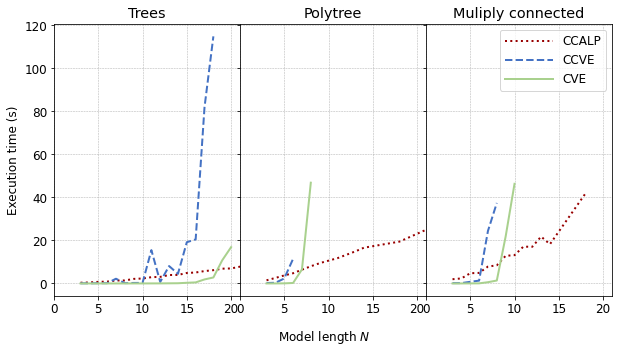

In [7]:
rcParams['axes.ymargin'] = 0.05
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(1, len(list(res_)), figsize=(10,5), sharey=True)

plot_func = plot_time
ylabel = "Execution time (s)"


def duplicate_N(data): 
    data["N"] = data["N"]*2; 
    return data

def to_seconds(data): 
    data["time"] = data["time"]/1000; 
    return data
    
plotted_data = {};
    
for k,v in res_.items():
    
    i = list(res_).index(k)
    T = []    
    T.append(to_seconds) 
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    _,dataout = plot_func(data, 
          ax=axs[i],
          transformation=T,
          title=f"{k}",
          xlabel=" ", ylabel=" ", legend=False)
    
    plotted_data[k] = dataout

    

    #axs[i].get_lines()[0].set_color("black")
    
    blue = "#4472C4"
    red = "#980000" 
    green = "#A9D18E"
    
    colors = [red, blue, green]
    style = ["dotted", "dashed", "solid"]
    marker = ["","",""]

    for k in range(0,3):
        axs[i].get_lines()[k].set_marker(marker[k])
        axs[i].get_lines()[k].set_linestyle(style[k])
        axs[i].get_lines()[k].set_color(colors[k])
        axs[i].get_lines()[k].set_linewidth(2)
        
#########   


axs[0].set_xlim(0,21)

# change y axis
for k in range(1,len(axs)):
    axs[k].set_xlim(axs[0].get_xlim())

for k in range(0,len(axs)):
    axs[k].grid(linestyle='--', linewidth=0.5)

axs[0].set_ylabel(ylabel)
axs[-1].legend(handlelength=4)


fig.text(0.5, 0.00, 'Model length $N$', ha='center')
plt.subplots_adjust(wspace=0, hspace=0)  

k=0
print([t.label for t in axs[k].xaxis.get_major_ticks()])
for k in range(0,len(axs)):
    axs[k].xaxis.get_major_ticks()[5].set_visible(False)


In [9]:
!pip install sklearn
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


def max_size_minute(x_train, y_train):
    regressor = LinearRegression()  
    regressor.fit(x_train, y_train) #training the algorithm
    beta = regressor.intercept_
    alpha = regressor.coef_
    return int((60 - beta)/alpha)

for k,v in plotted_data.items():
    d = v.query("method=='CCALP'")
    x_train = d.filter(["N"]).to_numpy(dtype="float32")
    y_train = d.filter(["time"]).to_numpy(dtype="float32").flatten()
    print(f"{max_size_minute(x_train,y_train)} for {k}")
      




  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached scikit_learn-0.23.1-cp36-cp36m-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached scipy-1.5.2-cp36-cp36m-macosx_10_9_x86_64.whl (28.8 MB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done
141 for Trees
46 for Polytree
29 for Muliply connected


/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/papers/2020-PGM-structural/experiments/utilplots.py:44: RuntimeWarning: Mean of empty slice
  for k in t.to_dict().keys() if "lowerbound" in k]), axis=1)


model=='Muliply connected'
mean = 0.00809714874882777 std = 0.008098007525621129
model=='Polytree'
mean = 0.00012850181833403066 std = 0.00022257167821952697
model=='Trees'
mean = 0.07137354432915641 std = 0.07080278513271306


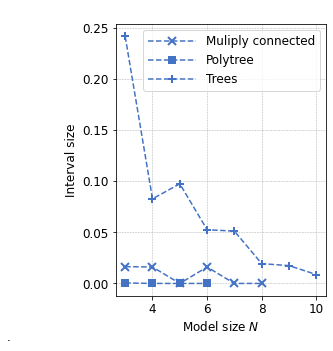

In [11]:
from pylab import rcParams
#rcParams['axes.xmargin'] = 0.05
#rcParams['axes.ymargin'] = 0.05

fig, axs = plt.subplots(1, 1, figsize=(4,5))

plot_func = plot_size
ylabel = "Interval size"

D = []
for k,v in res_.items():
    d = pd.read_csv(v["nonmarkovian_prec"], index_col=0);
    d = d.query("method=='CCVE'")
    d["model"] = k
    D = D + [d]

data = pd.concat(D)

    
_,plotted_size = plot_func(data, 
      ax=axs, series_column = "model", 
      title=" ", xlabel="Model size $N$", ylabel=ylabel, legend=False)


colors = [blue, blue, blue]
style = ["dashed", "dashed", "dashed"]
marker = ["x","s","+"]
msize = [8,6, 8]

for k in range(0,3):
    axs.get_lines()[k].set_markeredgewidth(2)
    axs.get_lines()[k].set_markersize(msize[k])
    axs.get_lines()[k].set_marker(marker[k])
    axs.get_lines()[k].set_linestyle(style[k])
    axs.get_lines()[k].set_color(colors[k])
    
    

axs.grid(linestyle='--', linewidth=0.5)

axs.legend(handlelength=4)

plt.subplots_adjust(wspace=0, hspace=10)  
fig.text(-0.2, 0.0, '.', ha='center')

plt.gcf().subplots_adjust(left=0.17)


/Users/rcabanas/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rcabanas/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


method=='CCALP'
mean = 0.006082434542998447 std = 0.007771294089968186
method=='CCVE'
mean = 0.0 std = 0.0
method=='CCALP'
mean = 0.00028982879866006934 std = 8.974508146179517e-05
method=='CCVE'
mean = 0.0 std = 0.0
method=='CCALP'
mean = 0.00025942581682274906 std = 5.775924992662314e-05
method=='CCVE'
mean = 0.0 std = 0.0


,method,N,rmse
0,CCALP,4,0.00022667378049049248
1,CCALP,5,0.00019100209618648313
2,CCALP,6,0.0003518947648607215
3,CCALP,7,0.00029796798200470976
4,CCALP,8,0.00022959046057133867
0,CCVE,4,0.0
1,CCVE,5,0.0
2,CCVE,6,0.0
3,CCVE,7,0.0
4,CCVE,8,0.0


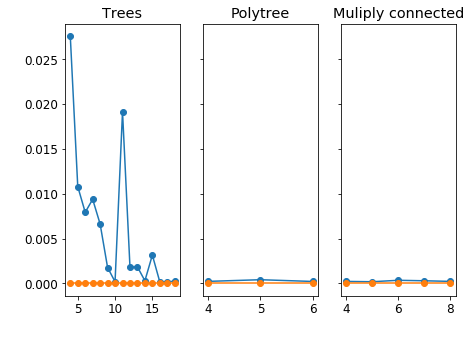

In [170]:
from pylab import rcParams
#rcParams['axes.xmargin'] = 0.05
rcParams['axes.ymargin'] = 0.05

fig, axs = plt.subplots(1, len(list(res_)), figsize=(7,5), sharey=True)

plot_func = plot_rmse
ylabel = "time (s.)"


def duplicate_N(data): 
    data["N"] = data["N"]*2; 
    return data

def to_seconds(data): 
    data["time"] = data["time"]/1000; 
    return data
    

for k,v in res_.items():
    i = list(res_).index(k)
    T = []
    T.append(to_seconds) 
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    _,dataout = plot_func(data.query("N>3"), 
          ax=axs[i],
          transformation=T,
          title=f"{k}",
          xlabel=" ", ylabel=" ", legend=False)


dataout    